# Eksik Veri
* Veri setlerinde eksik veri(missing values) yani boş DataFrame(nan) hücreleri bulunabilir.
* Bu durum, insan kaynaklı veri girişi ya da o değerin ölçümünün yapılmamasından kaynaklanabilir.
* Bir veri setinde bulunan eksik verileri göz ardı ederek çalışmak doğru bir seçenek değildir.
* Eksik veriler silinebilir, aritmetik ortalama ,mod ya da medyan değerleri ile doldurulabilir.
* Daha detaylı bilgi için:
* **https://www.veribilimiokulu.com/eksik-veri-eksik-veride-kullanilabilecek-algoritmalar/**
* **https://medium.com/@yigitsener/veri-biliminde-eksik-kayıp-verilere-yaklaşım-stratejileri-ve-python-pandas-uygulaması-501fbf643795**

## Eksik Veri Türleri
1. Tümüyle Raslantısal Kayıp:Diğer değişkenlerden ya da yapısal bir problemden kaynaklanmayan tamamen rastgele oluşan gözlemler.
2. Rastlantısal Kayıp:Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü.
3. Rastlantısal Olmayan Kayıp:Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü.

### Bu derste eksik verileri silme, görselleştirme ve eksik değerlerin yerine basit değer atama yöntemlerini ele alacağız.

In [106]:
import pandas as pd
import seaborn as sns

### Veri seti olarak `seaborn` kütüphanesinde bulunan `planets` isimli veri seti üzerinden yapacağız.

In [107]:
df= sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [108]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


## Eksik Değerleri Belirleme

### Sütunlarda eksik değer olan gözlem sayısını öğrenme

In [110]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

### Sütunlarda eksik değer olmayan gözlem sayısını öğrenme

In [111]:
df.notnull().sum()

method            1035
number            1035
orbital_period     992
mass               513
distance           808
year              1035
dtype: int64

### Tüm eksik değerlerin toplamını öğrenme

In [112]:
df.isnull().sum().sum()

792

### Sadece eksik değerlere ait gözlemleri çağırma

In [113]:
df[df.isnull().any(axis=1)]

,method,number,orbital_period,mass,distance,year
7,Radial Velocity,1,798.500000,NaN,21.41,1996
20,Radial Velocity,5,0.736540,NaN,12.53,2011
25,Radial Velocity,1,116.688400,NaN,18.11,1996
26,Radial Velocity,1,691.900000,NaN,81.50,2012
29,Imaging,1,NaN,NaN,45.52,2005
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### Eksik değer olmayan gözlemleri çağırma

In [114]:
df[df.notnull().all(axis=1)]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


* Eksik değerleri veri setimizden silebiliriz.
* Ancak eksik değerleri direk silmek zararlı olabilir.
* Eksik değerlerin neden ve nasıl oluştuğunu sorguladıktan sonra silme işlmine karar verilebilir.
* Aşağıda örnek olması için eksik verileri silmeyi göstereceğiz.

### Eksik verileri silme

In [115]:
df.dropna(inplace=True)
#(inplace=True parametresi işlemin veri setinde kalıcı olmasını sağlar)

In [116]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

* Yukarıda gördüğünüz gibi total_bedroom değişkenindeki 207 tane eksik değer silinmiş oldu.

* Eksik verileri silmede başka yöntemleri görmek için yeni bir veri seti oluşturalım.

In [117]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4=np.nan
yeni_df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3,
         "V4":V4}        
)

yeni_df

,V1,V2,V3,V4
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


* Aşağıdaki kod sonucunda satır bazındaki değerlerin hepsi eksik veri ise silinecektir.
* Altıncı satırın hepsi eksik veri oldğu için silinmiştir.

In [118]:
yeni_df.dropna(how = "all")

,V1,V2,V3,V4
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


* Aşağıdaki kod sonucunda gözlemlerin eğer hepsi eksik değer ise o değişkeni silinecektir.
* V4 değişkenin tüm gözlemleri eksik değer olduğu için V4 değişkeni silinmiştir.

In [119]:
yeni_df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Eksik Verileri Görselleştirme
* Eksik verilerin görselleştirilmesi eksik verilerin nasıl oluştuğunu,eksik verinin yapısını ve rassallığını incelememize ve anlamamıza yardımcı olur.

In [ ]:
!pip install missingno#kütüphaneyi yükleme

In [121]:
import missingno as msno

* Bu bölümde işlemleri `seaborn` kütüphanesinde bulunan `planets` isimli veri seti üzerinden yapacağız.

In [122]:
import seaborn as sns
planets= sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


* Aşağıdaki grafik değişkenlerdeki eksikliği oransal olarak ifade etmektedir.
* Grafiğin sağ tarafında yazan değerler gözlem birimini ifade etmektedir.
* Grafiğin sol tarafında yazan değerler gözlem birimini yüzde olarak ifade etmektedir.
* Grafiğin üst tarafında yazan değerler eksik veri olmayan gözlem birimini ifade eder.
* Grafikten herhangi bir değişkene ait eksik veri sayısını tespit edebiliriz.

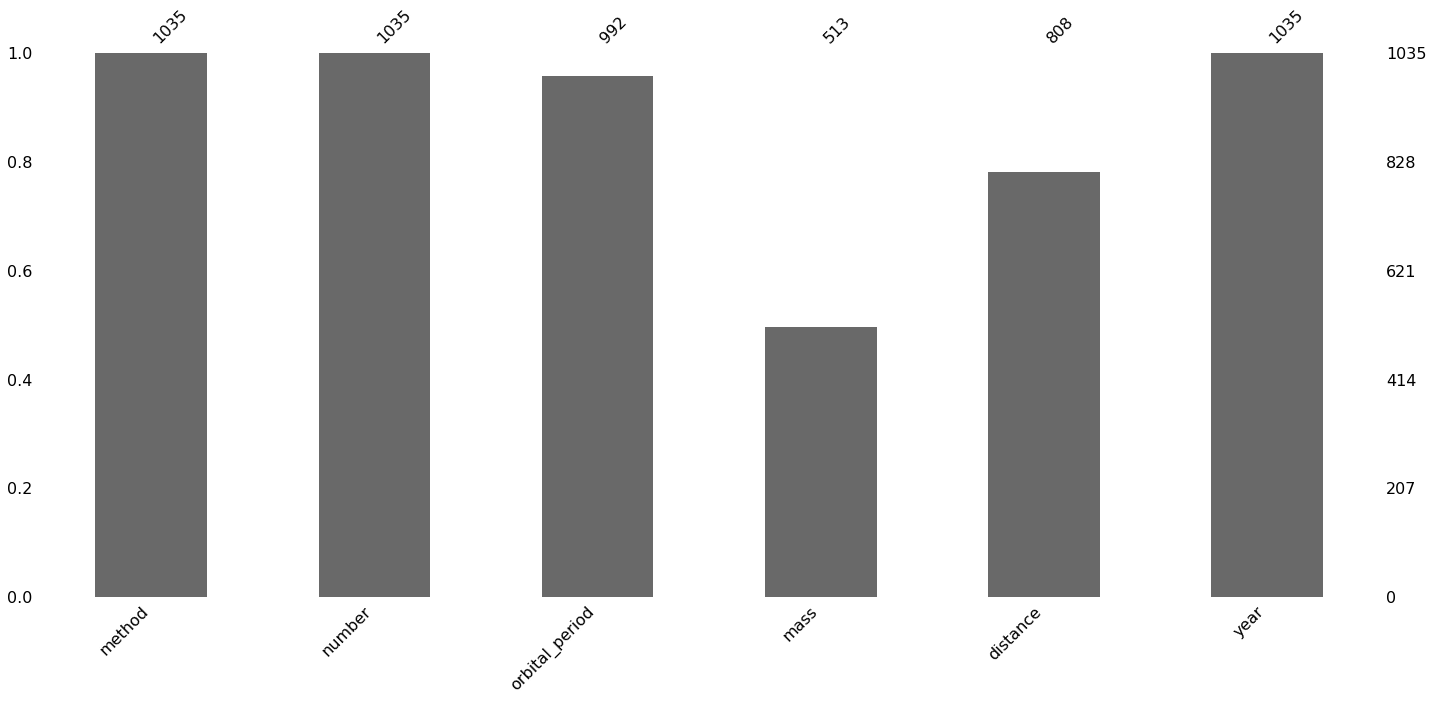

In [123]:
msno.bar(planets);

* Aşağıdaki grafikte beyaz olan bölümler eksik verileri ifade eder.
* Grafikte sol taraf gözlem sayısını ifade eder.
* Grafikte sağ taraf dolu gözlem sayısını ifade eder.
* Grafikte `orbital_period` değişkeni ile `mass` değişkeni arasında bir ilişki gözlemlenir.
* `orbital_period` değişkeninde bir eskik veri bulunduğunda `mass` değişkeninde de eksik veri gözlenmektedir.
* Grafik sonucunda bu veri setindeki eksik değerlerin rasgale oluşmadığı yorumunu yapabiliriz.

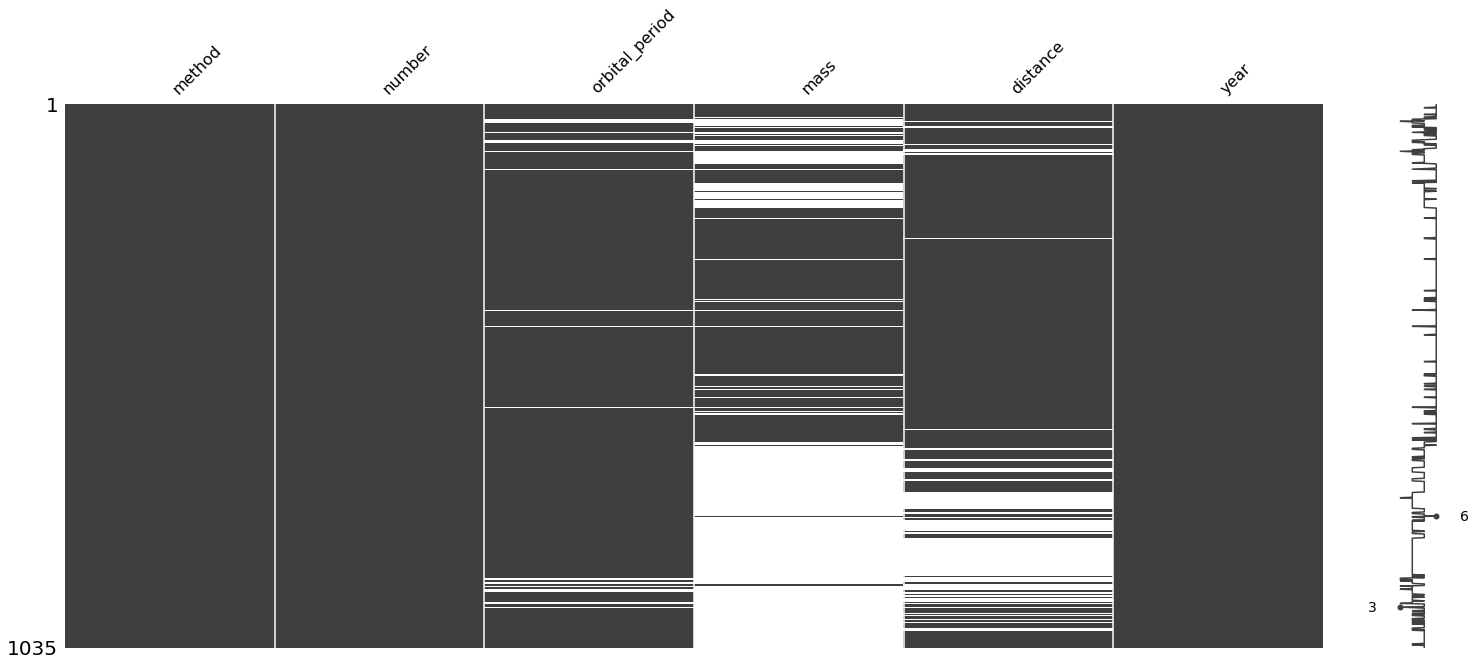

In [124]:
msno.matrix(planets);

## Değer Atama Yöntemleri
* Eksik verilerin yerine aritmetik ortalama ,mod, medyan ya da istenilen herhangi değerler atanabilir.

In [131]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik değerlerin yerine sıfır değeri atama

In [126]:
df["V1"].fillna(0,inplace=True)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,0.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,0.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik değerlerin yerine ortalama değer atama

In [128]:
df["V1"].fillna(df["V1"].mean(),inplace=True)#sadece V1 değişkeni için 
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,6.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [130]:
df.fillna(df.mean()[:])#tüm değişkenler için

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Eksik değerlerin yerine medyan değeri atama

In [132]:
df.fillna(df.median(),inplace=True)
df

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,6.0,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,6.0,7.0
6,6.0,6.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Kategorik Değişken Kırılımında Değer Atama

* Yeni bir veri seti oluşturalım.
* Veri setimizde maas ve ünvan adında iki değişken olsun.
* Maaş sütunundaki eksik değerlere tüm çalışanların maaş ortlaması yerine maaşı etkileyen kategorik değişknelerin ortalamasını atamak daha doğru sonuçlar verir.

In [134]:
import numpy as np
import pandas as pd
maas= np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
unvan= np.array(["MÜHENDİS",np.nan,"TEKNİKER","TEKNİKER","TEKNİKER","TEKNİKER","TEKNİKER","MÜHENDİS","MÜHENDİS"]
              , dtype=object)
df=pd.DataFrame(
{"maas":maas,
"unvan":unvan})
df

,maas,unvan
0,1.0,MÜHENDİS
1,3.0,NaN
2,6.0,TEKNİKER
3,NaN,TEKNİKER
4,7.0,TEKNİKER
5,1.0,TEKNİKER
6,NaN,TEKNİKER
7,9.0,MÜHENDİS
8,15.0,MÜHENDİS


* Kategorik değişken kırılımında değer atama yapabilmek için `groupby` işlemi yapmamız gererkir.
* Mühendis ve teknikerlerin maaşlarının ortlama değerini öğrenelim.

In [135]:
df.groupby("unvan")["maas"].mean()

unvan
MÜHENDİS    8.333333
TEKNİKER    4.666667
Name: maas, dtype: float64

### Eksik verileri kategorik değişken kırılımında ortalama değer ile doldurma

In [136]:
df["maas"].fillna(df.groupby("unvan")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64